In [1]:
import os
os.chdir('../..')
os.getcwd()

'C:\\Users\\fim19\\MY_FILES\\studying\\MIPT\\masters_paper\\work_with_data\\code'

In [2]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nilmtk
from nilmtk import DataSet, MeterGroup

plt.style.use('ggplot')
rcParams['figure.figsize'] = (12, 9)



In [3]:
# redd.buildings[2].__dir__()
# redd.buildings[2].metadata
# redd.buildings[2].import_metadata
# redd.buildings[1].describe()

In [4]:
elec.mains()

NameError: name 'elec' is not defined

In [4]:
redd = DataSet('../data/nilmtk_storage/redd.h5')
elec = redd.buildings[6].elec
data = elec.mains().power_series_all_data()
# data = data[:len(data)//40]

TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'

In [64]:

# print(data.count())
# print(data.count()*2)
# print(len(values))
# print(len(data.index.astype(np.int64)))
# print(type(data))

In [65]:
values = data.values
int_dates = data.index.astype(np.int64) // 10**9

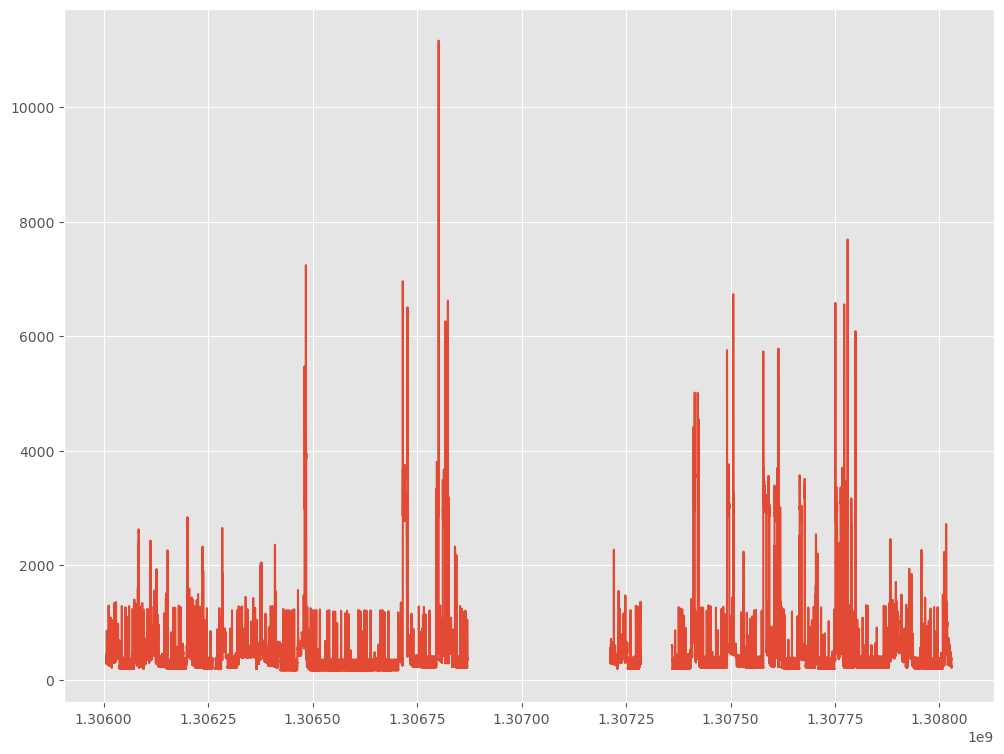

In [66]:
plt.plot(int_dates, values)
plt.show()

In [3]:
keys = sorted(redd.buildings.keys())
keys

[1, 2, 3, 4, 5, 6]

In [6]:
from contextlib import contextmanager
import time

DAY_IN_SEC = 60*60*24
MONTH_IN_SEC = 30*DAY_IN_SEC

@contextmanager
def time_measure(name):
    start_time = time.time()
    yield
    elapsed_time = time.time() - start_time
    minutes = int(elapsed_time // 60)
    print(f'[{name}] finished in {minutes}m {elapsed_time % 60:.2f}s')

In [68]:
def get_stable_periods(int_dates, duration=MONTH_IN_SEC, max_gap=5):
    stable_period_start_indexes = [0]
    stable_period_end_indexes = []
    deltas = [0] + [
        int_dates[i] - int_dates[i-1]
        for i in range(1, len(int_dates))
    ]
    
    interval_lens = [1] * len(int_dates)
    for i in range(len(int_dates)):
        if interval_lens[i-1] < duration:
            if deltas[i] <= max_gap:
                interval_lens[i] = interval_lens[i-1] + deltas[i]
            else:
                stable_period_start_indexes.pop()
                stable_period_start_indexes.append(i)
        else:
            stable_period_start_indexes.append(i)
            stable_period_end_indexes.append(i)
            
    return stable_period_start_indexes, stable_period_end_indexes

In [126]:
def clear_nulls(data):
#     def is_valid(x):
# #         return (x is not None) \
# #             & isinstance(x, (np.floating, float)) \
# #             & np.isfinite(x) \
# #             & (x >= 0)
#         return x.notnull() & (x >= 0)
    
#     print(type(data))
#     print(type(data[data.apply(is_valid)]))
#     print(data[data.apply(is_valid)])
    
    new_data = pd.to_numeric(data, errors='coerce')
    new_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    new_data = new_data.dropna()
    return new_data[new_data >= 0]
    
#     return data[data.apply(is_valid)]

In [128]:
with time_measure('filtering invalid data'):
    for i in range(len(keys)):
        elec = redd.buildings[keys[i]].elec
        data = elec.mains().power_series_all_data()
        count1 = data.count()
        len1 = len(data.values)
        data = clear_nulls(data)
        print(f'count1={count1} len1={len1} count2={data.count()} len2={len(data.values)}')

Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
count1=1577246 len1=3134093 count2=1577246 len2=1577246
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
count1=1207199 len1=3026449 count2=1207199 len2=1207199
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
count1=1475555 len1=3870507 count2=1475555 len2=1475555
Loading data for meter ElecMeterID(instance=2, building=4, dataset='REDD')     
Done loading data all meters for this chunk.
count1=1681311 len1=4145366 count2=1681311 len2=1681311
Loading data for meter ElecMeterID(instance=2, building=5, dataset='REDD')     
Done loading data all meters for this chunk.
count1=312613 len1=3786977 count2=312613 len2=312613
Loading data for meter ElecMeterID(instance=2, building=6, dataset='REDD')     
Done loading data 

In [69]:
with time_measure('finding stable months'):
    for i in range(len(keys))[:1]:
        elec = redd.buildings[keys[i]].elec
        data = elec.mains().power_series_all_data()
        int_dates = data.index.astype(np.int64) // 10**9
        periods = get_stable_periods(int_dates, duration=7*DAY_IN_SEC, max_gap=1)
        print(len(periods[1]))

Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
5
[finding stable months] finished in 0m 17.85s


Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
1577246
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
1207199
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
1475555
Loading data for meter ElecMeterID(instance=2, building=4, dataset='REDD')     
Done loading data all meters for this chunk.
1681311
Loading data for meter ElecMeterID(instance=2, building=5, dataset='REDD')     
Done loading data all meters for this chunk.
312613
Loading data for meter ElecMeterID(instance=2, building=6, dataset='REDD')     
Done loading data all meters for this chunk.
1597225
[finding stable months] finished in 0m 32.01s


In [71]:
values

array([294.24, 294.24, 292.76, ..., 221.23, 216.36,    nan], dtype=float32)

In [74]:
# values[len(values)//2 : len(values)//2 + 100]
nan_val = values[len(values)//2]
print(type(nan_val))
print(nan_val == None)
print(nan_val == None)
print(nan_val == None)


numpy.float32

In [130]:
with time_measure('finding stable periods'):
    for i in range(len(keys)):
        elec = redd.buildings[keys[i]].elec
        data = elec.mains().power_series_all_data()
        data = clear_nulls(data)
        int_dates = data.index.astype(np.int64) // 10**9
        periods = get_stable_periods(int_dates, duration=DAY_IN_SEC, max_gap=1)
        print(len(periods[1]))

Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
11
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
7
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
9
Loading data for meter ElecMeterID(instance=2, building=4, dataset='REDD')     
Done loading data all meters for this chunk.
10
Loading data for meter ElecMeterID(instance=2, building=5, dataset='REDD')     
Done loading data all meters for this chunk.
0
Loading data for meter ElecMeterID(instance=2, building=6, dataset='REDD')     
Done loading data all meters for this chunk.
12
[finding stable periods] finished in 0m 56.15s
